In [1]:
%matplotlib notebook

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin_cg
from mpl_toolkits.mplot3d import Axes3D

In [2]:
ex2data1 = np.genfromtxt('ex2data1.txt', delimiter=",")

In [3]:
#extract data
X = ex2data1[:,0:2]
y = ex2data1[:,2]

<IPython.core.display.Javascript object>


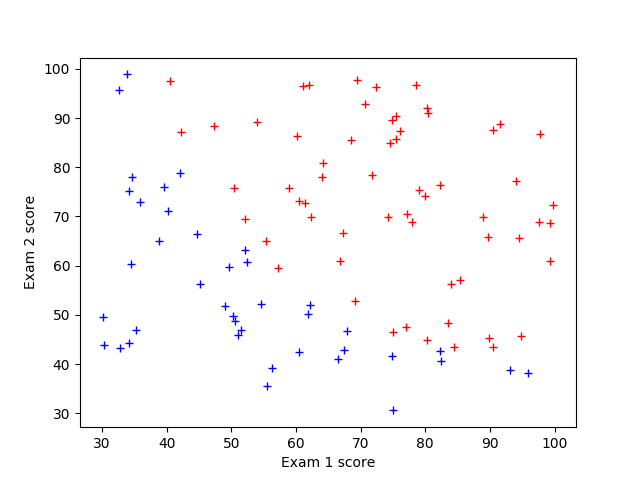

In [4]:
# ==================== Part 1: Plotting ====================
pos = ex2data1[ex2data1[:,2] == 1][:,0:2]
neg = ex2data1[ex2data1[:,2] == 0][:,0:2]
plt.figure()
plt.plot(pos[:,0], pos[:,1], 'r+')
plt.plot(neg[:,0], neg[:,1], 'b+')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.show()

In [5]:
#add ones to X
X = np.c_[np.ones((len(ex2data1))), X]

<IPython.core.display.Javascript object>


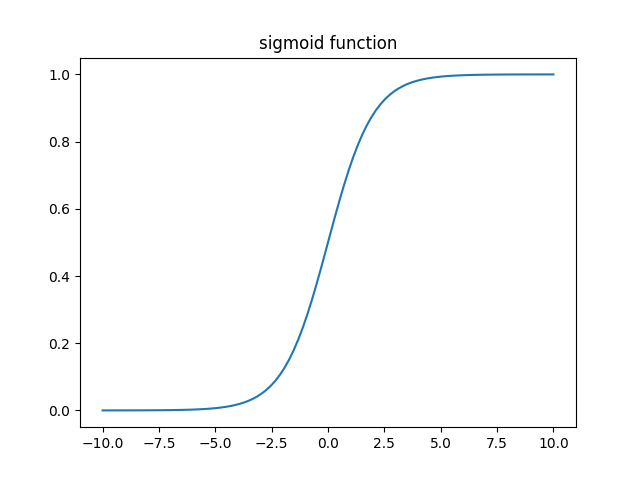

In [6]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

xx = np.linspace(-10, 10, 100)
plt.figure()
plt.plot(xx, sigmoid(xx))
plt.title('sigmoid function')
plt.show()

In [7]:
# ============ Part 2: Compute Cost and Gradient ============
#  In this part of the exercise, you will implement the cost and gradient
#  for logistic regression. You neeed to complete the code in 
#  costFunction.m
theta = np.zeros(3)

def costFunction(theta, X, y):
    m = len(X)
    htheta = sigmoid(np.matmul(X, theta))
    return (1/m) * np.sum(np.multiply(-y, np.log(htheta)) - np.multiply(1 - y, np.log(1 - htheta)))

def calculateGradient(theta, X, y):
    m = len(X)
    htheta = sigmoid(np.matmul(X, theta))
    grad = np.zeros(len(theta))
    
    for i in range(0, len(theta)):
        grad[i] = (1/m) * np.sum(np.multiply(htheta - y, X[:, i]))
        
    return grad

cost = costFunction(theta, X, y)
grad = calculateGradient(theta, X, y)

print('Cost at initial theta (zeros): ' + str(cost) + '\n')
print('Gradient at initial theta (zeros): \n')
print(grad);

Cost at initial theta (zeros): 0.69314718056

Gradient at initial theta (zeros): 

[ -0.1        -12.00921659 -11.26284221]


In [8]:
def trainLinearReg(X, y, initial_theta):
    return fmin_cg(costFunction, initial_theta, fprime=calculateGradient, args=(X, y), maxiter=400, disp=False)

initial_theta = [0] * X.shape[1]
trained_theta = trainLinearReg(X, y, initial_theta)
print(trained_theta)
cost = costFunction(trained_theta, X, y)
print(cost)

[-25.16144164   0.20623256   0.2014725 ]
0.203497701591


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in multiply
  # Remove the CWD from sys.path while we load stuff.


<IPython.core.display.Javascript object>


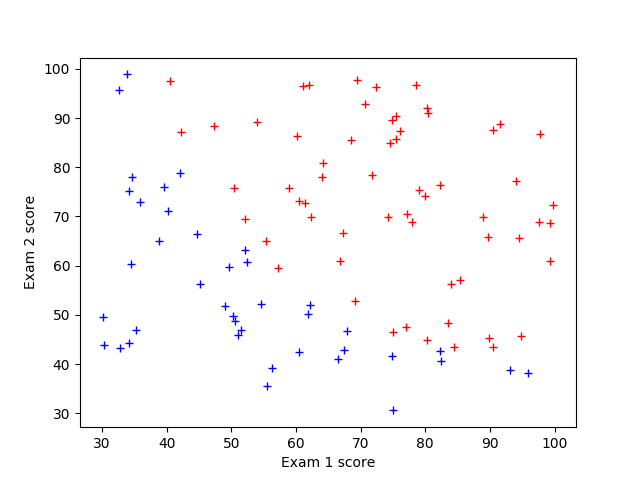

In [9]:
plt.figure()
plt.plot(pos[:,0], pos[:,1], 'r+')
plt.plot(neg[:,0], neg[:,1], 'b+')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.plot()
plt.show()

In [10]:
# ============== Part 4: Predict and Accuracies ==============
prob = sigmoid(np.matmul([1, 45, 85], trained_theta))
print('For a student with scores 45 and 85, we predict an admission robability of ' + str(prob))

For a student with scores 45 and 85, we predict an admission robability of 0.776291755882


In [11]:
p = sigmoid(np.matmul(X, trained_theta))
pp = p >= 0.5
yy = y == 1.
py = pp==yy
acc = len(py[py==True]) / len(py)
print('Train Accuracy: '+ str(acc* 100) + '%')

Train Accuracy: 89.0%
